In [1]:
# %%
## FIGURE 1 - LIVE IMAGING OF SEIZURES IN AWAKE ANIMALS
import sys
sys.path.extend(['/home/pshah/Documents/code/AllOpticalSeizure', '/home/pshah/Documents/code/AllOpticalSeizure'])

from funcsforprajay.funcs import smoothen_signal, flattenOnce
import funcsforprajay.plotting as pplot
# from funcsforprajay.plotting import make_general_scatter
from _analysis_.sz_analysis._ClassSuite2pROIsSzAnalysis import Suite2pROIsSz, Suite2pROIsSzResults
from _results_.sz4ap_results import plotHeatMapSzAllCells


from _utils_.io import import_expobj

import _alloptical_utils as Utils
from _utils_ import alloptical_plotting as aoplot

from scipy import stats

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from _main_.Post4apMain import Post4ap


importing resultsobj from: /home/pshah/mnt/qnap/Analysis/alloptical_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.AllOpticalResults'> resultsobj 



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/alloptical_results_superobject.pkl ... 
|-DONE IMPORT of <class 'alloptical_utils_pj.AllOpticalResults'> resultsobj 




In [3]:
# %% F) DECONVOLVED SPIKE RATE ANALYSIS

results = Suite2pROIsSzResults.load()

#  collect spk rates
Suite2pROIsSz.collect__avg_spk_rate(Suite2pROIsSzResults=results, rerun=False)



Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__Suite2pROIsSz.pkl ... 


/tmp/ipykernel_15068/1020589022.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_15068/1020589022.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


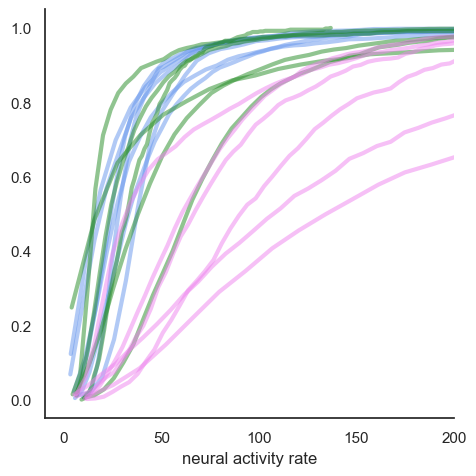

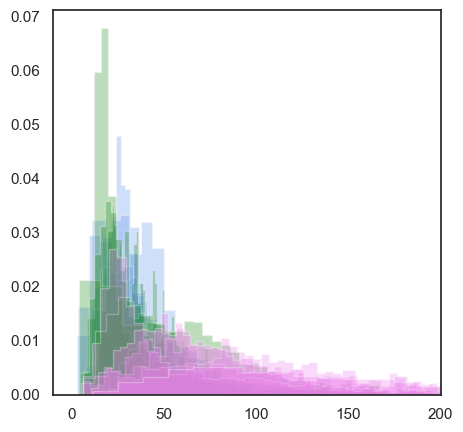

In [7]:

# %% invidual results as a cum sum plot

# evaluate the histogram
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
f, ax2 = plt.subplots(figsize=(5, 5), dpi=100)
# baseline experiments
for pre4ap_exp in results.neural_activity_rate['baseline']:
    # test plot cumsum plot
    values, base = np.histogram(pre4ap_exp, bins=100)

    ax2.hist(pre4ap_exp, density=True, histtype='stepfilled', alpha=0.3, bins=100, color='cornflowerblue')

    # evaluate the cumulative function
    cumulative = np.cumsum(values) / len(pre4ap_exp)

    # plot the cumulative function
    ax.plot(base[:-1], cumulative, c='cornflowerblue', alpha=0.5, lw=3)

# interictal experiments
for interictal_exp in results.neural_activity_rate['interictal']:
    # test plot cumsum plot
    values, base = np.histogram(interictal_exp, bins=100)

    ax2.hist(interictal_exp, density=True, histtype='stepfilled', alpha=0.3, bins=100, color='forestgreen')

    # evaluate the cumulative function
    cumulative = np.cumsum(values) / len(interictal_exp)

    # plot the cumulative function
    ax.plot(base[:-1], cumulative, c='forestgreen', alpha=0.5, lw=3)

# ictal experiments
for ictal_exp in results.neural_activity_rate['ictal']:
    # test plot cumsum plot
    values, base = np.histogram(ictal_exp, bins=100)

    ax2.hist(ictal_exp, density=True, histtype='stepfilled', alpha=0.3, bins=100, color='violet')

    # evaluate the cumulative function
    cumulative = np.cumsum(values) / len(ictal_exp)

    # plot the cumulative function
    ax.plot(base[:-1], cumulative, c='violet', alpha=0.5, lw=3)


ax.set_xlim([-10, 200])
ax2.set_xlim([-10, 200])
ax.set_xlabel('neural activity rate')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout(pad=1.3)

fig.show()
f.show()



In [8]:

baseline_spks = []
for pre4ap_exp in results.spk_rates['baseline']:
    # baseline_spks.extend([np.mean(pre4ap_exp)])
    baseline_spks.extend(pre4ap_exp)

interictal_spks = []
for interictal_exp in results.spk_rates['interictal']:
    # interictal_spks.extend([np.mean(interictal_exp)])
    interictal_spks.extend(interictal_exp)


ictal_spks = []
for ictal_exp in results.spk_rates['ictal']:
    # interictal_spks.extend([np.mean(ictal_exp)])
    ictal_spks.extend(ictal_exp)


print(f'len baseline: {len(baseline_spks)}, len interictal: {len(interictal_spks)}')

d = dict(baseline = baseline_spks, interictal = interictal_spks, ictal = ictal_spks)

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))


len baseline: 11162, len interictal: 9848


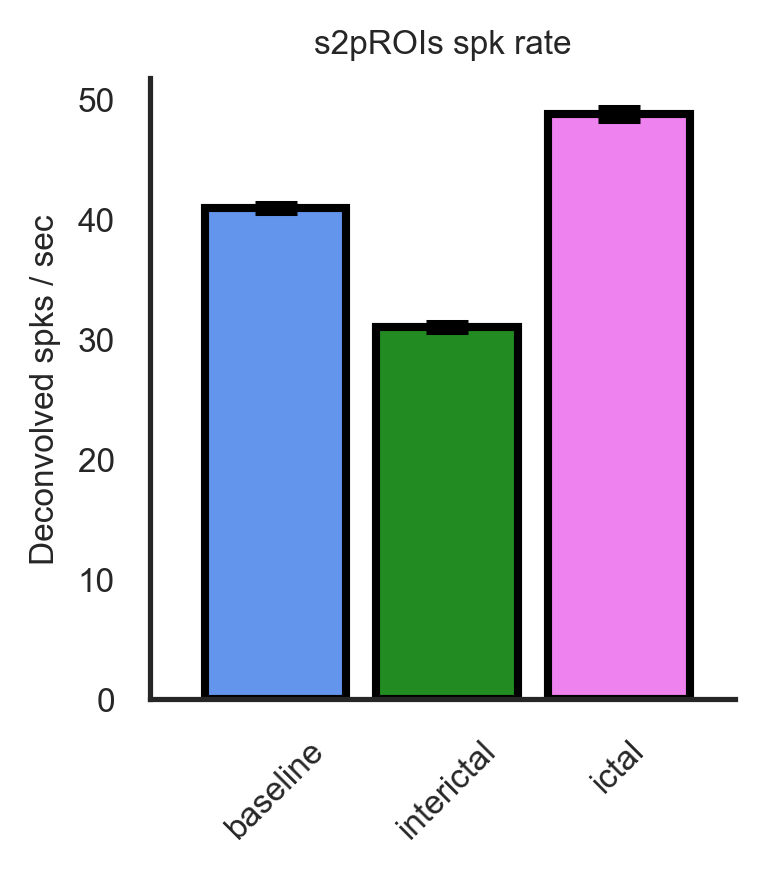

In [11]:
pplot.plot_bar_with_points(
    data=[baseline_spks, interictal_spks,ictal_spks],
    bar=True, x_tick_labels=['baseline', 'interictal', 'ictal'], points=False,
    colors=['cornflowerblue', 'forestgreen', 'violet'], lw=1.3,
    expand_size_x=0.4, title='s2pROIs spk rate', y_label='Deconvolved spks / sec', alpha=0.7,
    expand_size_y=1.2, figsize=(3,3))


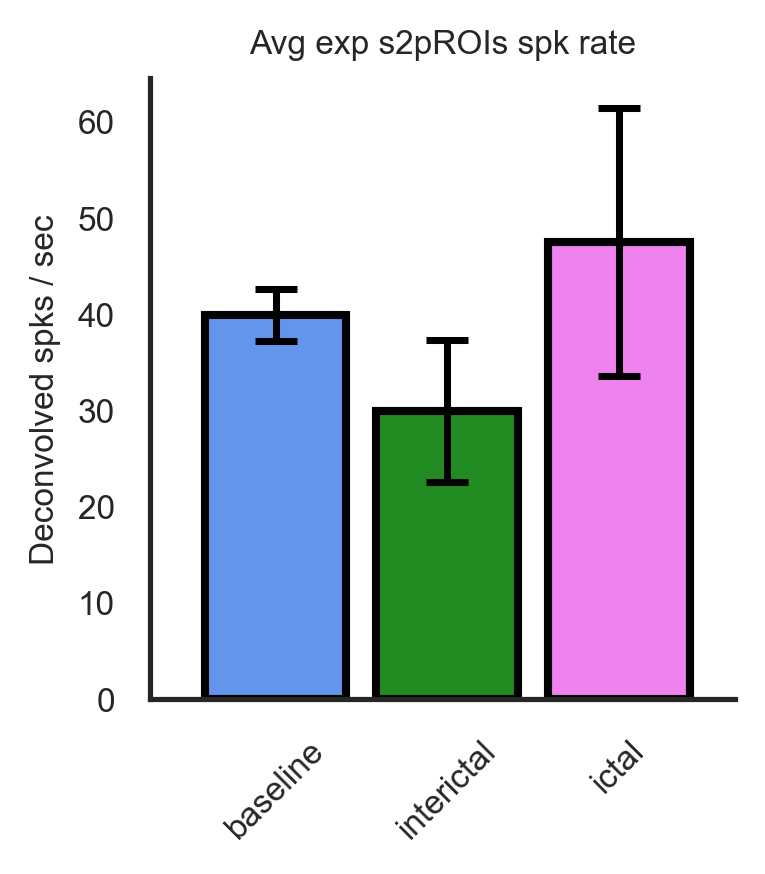

In [12]:
pplot.plot_bar_with_points(
    data=[results.avg_spk_rate['baseline'], results.avg_spk_rate['interictal'],
          results.avg_spk_rate['ictal']],
    bar=True, x_tick_labels=['baseline', 'interictal', 'ictal'], points=False,
    colors=['cornflowerblue', 'forestgreen', 'violet'], lw=1.3,
    expand_size_x=0.4, title='Avg exp s2pROIs spk rate', y_label='Deconvolved spks / sec', alpha=0.7,
    expand_size_y=1.2, figsize=(3,3))



P(t-test - response: baseline vs. interictal): 
		2.070e-01


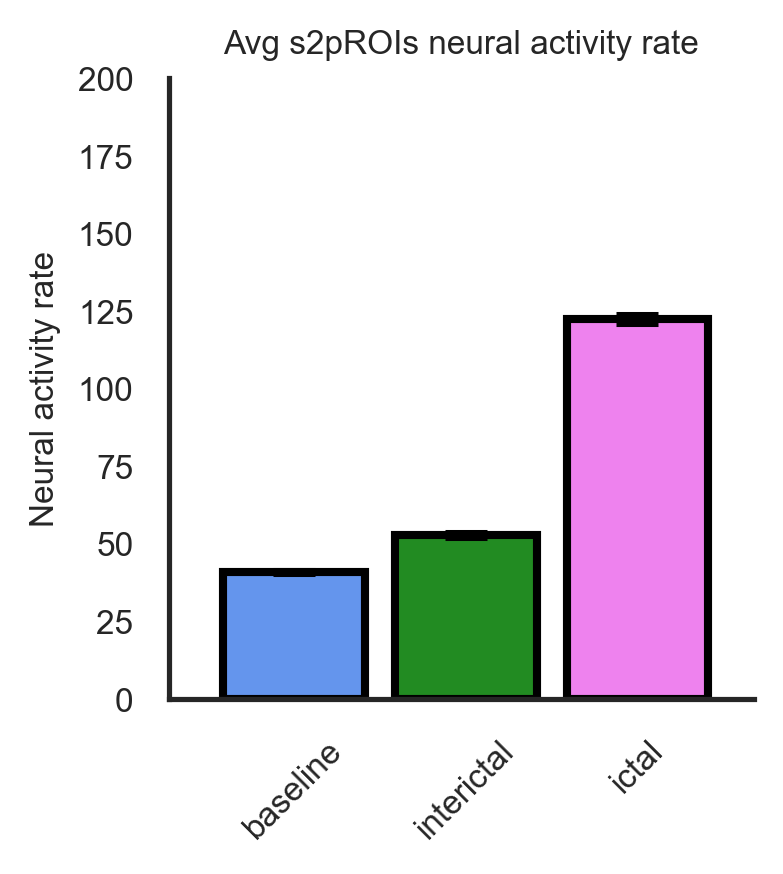

In [13]:
pplot.plot_bar_with_points(
    data=[flattenOnce(results.neural_activity_rate['baseline']), 
          flattenOnce(results.neural_activity_rate['interictal']),
          flattenOnce(results.neural_activity_rate['ictal'])],
    bar=True, x_tick_labels=['baseline', 'interictal', 'ictal'], points=False,
    colors=['cornflowerblue', 'forestgreen', 'violet'], lw=1.3,
    expand_size_x=0.4, title='Avg s2pROIs neural activity rate', y_label='Neural activity rate', alpha=0.7,
    expand_size_y=1.2, figsize=(3,3), ylims=[0, 200])


print(f"P(t-test - response: baseline vs. interictal): \n\t\t{stats.ttest_ind(results.avg_spk_rate['baseline'], results.avg_spk_rate['interictal'])[1]:.3e}")


In [21]:
[np.mean(i) for i in results.neural_activity_rate['baseline']]

[50.333494664807496,
 36.60256229134122,
 32.38787455600663,
 32.709931563717305,
 35.745555830032025,
 46.67610940405449,
 44.74812079202438]

1-way ANOVA  of baseline, interictal and ictal activity rates: 0.003138182564297373


/tmp/ipykernel_15068/3938924597.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


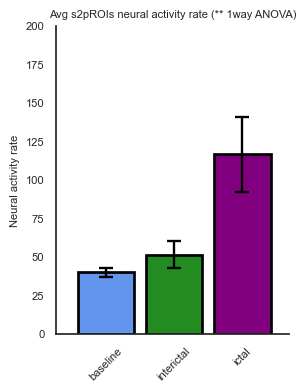

In [35]:
activity_rates = [[np.mean(i) for i in results.neural_activity_rate['baseline']], 
          [np.mean(i) for i in results.neural_activity_rate['interictal']],
          [np.mean(i) for i in results.neural_activity_rate['ictal']]]

fig, ax = plt.subplots(figsize=(3,4))

pplot.plot_bar_with_points(
    data=[[np.mean(i) for i in results.neural_activity_rate['baseline']], 
          [np.mean(i) for i in results.neural_activity_rate['interictal']],
          [np.mean(i) for i in results.neural_activity_rate['ictal']]],
    bar=True, x_tick_labels=['Baseline', 'Interictal', 'Ictal'], points=False,
    colors=['cornflowerblue', 'forestgreen', 'purple'], lw=1.3,
    expand_size_x=0.4, title='Avg s2pROIs neural activity rate (** 1way ANOVA)', y_label='Neural activity rate', alpha=0.7,
    expand_size_y=1.2, ylims=[0, 200], 
    ax=ax, fig=fig)
fig.show()


oneway_r = stats.f_oneway(*activity_rates)

print(f"1-way ANOVA  of baseline, interictal and ictal activity rates: {oneway_r.pvalue}")

P(t-test - response: baseline vs. interictal): 
		2.070e-01


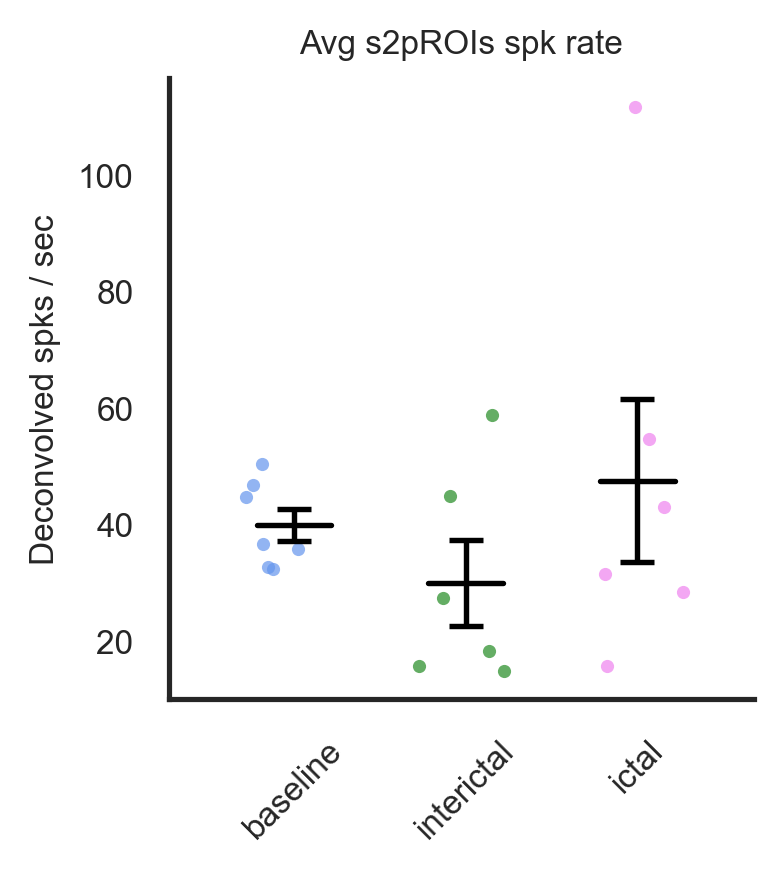

In [14]:
pplot.plot_bar_with_points(
    data=[results.avg_spk_rate['baseline'], results.avg_spk_rate['interictal'],
          results.avg_spk_rate['ictal']],
    bar=False, x_tick_labels=['baseline', 'interictal', 'ictal'], points=True,
    colors=['cornflowerblue', 'forestgreen', 'violet'], lw=1.3,
    expand_size_x=0.4, title='Avg s2pROIs spk rate', y_label='Deconvolved spks / sec', alpha=0.7,
    expand_size_y=1.2, figsize=(3,3))


print(f"P(t-test - response: baseline vs. interictal): \n\t\t{stats.ttest_ind(results.avg_spk_rate['baseline'], results.avg_spk_rate['interictal'])[1]:.3e}")
